In [1]:
!pip install cohere==4.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.6 MB/s eta 0:00:00


In [2]:
import cohere
import numpy as np
import seaborn as sns

api_key = '' # Paste your API key here. This is a trial key. These are free from Cohere.
co = cohere.Client(api_key)

## Turn text into embeddings

In [3]:
oranges = np.array(co.embed(["oranges"]).embeddings)
lemons = np.array(co.embed(["lemons"]).embeddings)
limes = np.array(co.embed(["limes"]).embeddings)
key_limes = np.array(co.embed(["key_limes"]).embeddings)
tangerines = np.array(co.embed(["tangerines"]).embeddings)
pineapples = np.array(co.embed(["pineapples"]).embeddings)
mangoes = np.array(co.embed(["mangoes"]).embeddings)
papayas = np.array(co.embed(["papayas"]).embeddings)
kiwis = np.array(co.embed(["kiwis"]).embeddings)
guavas = np.array(co.embed(["guavas"]).embeddings)


In [4]:
oranges

array([[-1.6816406 , -2.0820312 ,  2.1933594 , ...,  1.6738281 ,
         0.55566406,  0.19262695]])

In [5]:
len(oranges[0])

4096

## Calculate dot products

- lemons
- limes
- kiwis

In [7]:
from numpy import dot
print("Similarity between lemons and limes:", dot(lemons[0], limes[0]))
print("Similarity between lemons and kiwis:", dot(lemons[0], kiwis[0]))
print("Similarity between limes and kiwis:", dot(limes[0], kiwis[0]))

Similarity between lemons and limes: 6950.305172069036
Similarity between lemons and kiwis: 4479.325803869309
Similarity between limes and kiwis: 4505.813536568587


## Calculate cosine similarities

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between lemons and limes:", cosine_similarity(lemons, limes)[0][0])
print("Cosine similarity between lemons and kiwis:", cosine_similarity(lemons, kiwis)[0][0])
print("Cosine similarity between limes and kiwis:", cosine_similarity(limes, kiwis)[0][0])

Cosine similarity between lemons and limes: 0.7707253330210173
Cosine similarity between lemons and kiwis: 0.5060344985306011
Cosine similarity between limes and kiwis: 0.506230746119429


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between lemons and lemons:", cosine_similarity(lemons, lemons)[0][0])
print("Cosine similarity between limes and limes:", cosine_similarity(limes, limes)[0][0])
print("Cosine similarity between kiwis and kiwis:", cosine_similarity(kiwis, kiwis)[0][0])

Cosine similarity between lemons and lemons: 1.0000000000000018
Cosine similarity between limes and limes: 0.9999999999999984
Cosine similarity between kiwis and kiwis: 0.9999999999999977


[Text(0.5, 0, 'lemons'), Text(1.5, 0, 'limes'), Text(2.5, 0, 'kiwis')]

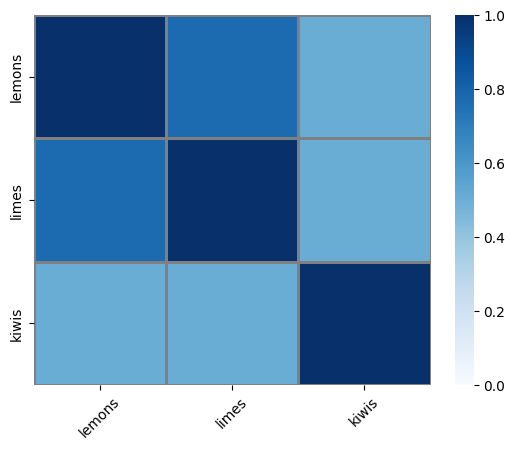

In [10]:
embeddings = [lemons, limes, kiwis]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Blues",
                 linewidths=1, linecolor='grey',
                 xticklabels=["lemons", "limes", "kiwis"],
                 yticklabels=["lemons", "limes", "kiwis"],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


## Calculate cosine similarities for sentences

In [11]:
lemons = "Lemons are rich in vitamin C"
limes = "Limes are tangy and acidic"
jordan = "Michael Jordan played for the Chicago bulls"

lemons_emb = np.array(co.embed([lemons]).embeddings)
limes_emb = np.array(co.embed([limes]).embeddings)
jordan_emb = np.array(co.embed([jordan]).embeddings)

In [12]:
len(lemons_emb[0])

4096

[Text(0.5, 0, 'Lemons are rich in vitamin C'),
 Text(1.5, 0, 'Limes are tangy and acidic'),
 Text(2.5, 0, 'Michael Jordan played for the Chicago bulls')]

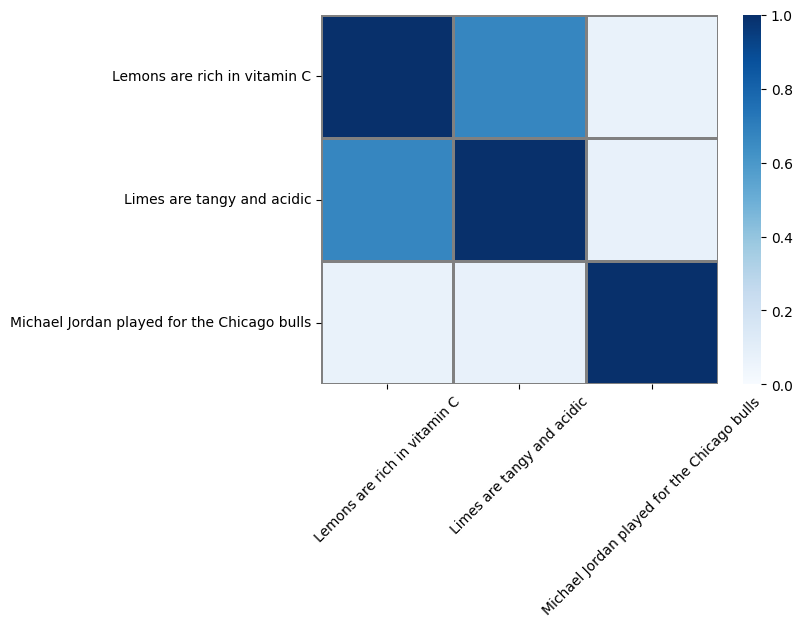

In [13]:
embeddings = [lemons_emb, limes_emb, jordan_emb]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Blues",
                 linewidths=1, linecolor='grey',
                 xticklabels=[lemons, limes, jordan],
                 yticklabels=[lemons, limes, jordan],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)